# 以基因演算法解決Knapsack問題
以python實作基因演算法，對[p06](https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html)資料集迭代100次後，得出收斂結果，並產生圖形。

## GA (Genetic Algorithm)簡介
進行下列操作：
* Setting
  - 設定必要參數：交配率(crossover rate)、突變率(mutation rate)、初始群體數量(population)、終止條件等等
  
* Initilization
  - 固定陣列大小後，在每個index隨機生成0或1

* Transition/Selection
  - 挑選出2個染色體（兩筆表現最好的資料）
  - 採用精英挑選法，計算當前群體profits最優者，以此兩筆進行下一步

* Crossover 交配
  - 交配：選定資料的其中一個位置，將資料切割，互相交換後成為兩筆新資料
  - 生成隨機機率值，若在crossover rate的範圍內就進行交配；若否則維持原
  - 採單點交配，意指只會切割一次

* Mutation 突變
  - 突變：隨機選擇一個位址發生0->1（或1->0）
  - 生成隨機機率值，若在mutation rate範圍內，就進行突變；若否則維持原狀

* Fitness 適應性
  - 汰除超出負重的資料
  - 留下profit較高的資料

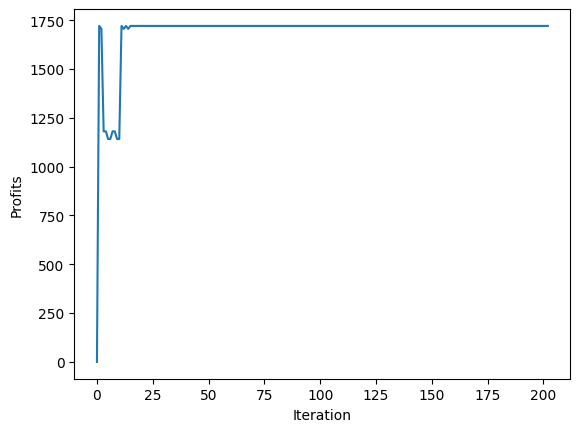

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# 導入資料
p06_c = 170
p06_w = [41, 50, 49, 59, 55, 57, 60]
p06_p = [442, 525, 511, 593, 546, 564, 617]
p06_s = [0, 1, 0, 1, 0, 0, 1]


# 設定參數
capacity = p06_c
wList = p06_w
pList = p06_p

## 交配率、突變率、群體數量、終止條件
population = 200
crossRate = 0.9
mutationRate = 0.001
### 經觀察，發現若突變機率增高，則圖形較不容易收斂

# 初始化：生成01隨機分佈的陣列
def initialize( data_list ):
    initList = []
    for i in range(len(data_list)):
        initList.append(random.choice([0,1]))
    return initList

# 計算profits，若超出負重則profit為0
def evaluate( data_list ):
    global capacity , wList , pList
    weight = 0
    profit = 0
    for i in range(len(data_list)):
        if data_list[i] == 1:
            weight += wList[i]
            profit += pList[i]
    if weight > capacity:
        return 0
    else:
        return profit

# 轉換Transition
## 菁英選擇法：從所有候選之中，挑選2個profit最優者繁衍
def transition( listOfLists ):
    profitContainer = []
    resultList = []
    temp = listOfLists.copy()
    for i in temp:
        profitContainer.append(evaluate(i))
    for i in range(2):
        targIdx = profitContainer.index(max(profitContainer))
        profitContainer.remove(profitContainer[targIdx])
        resultList.append(temp.pop(targIdx))
    return  resultList

# Crossover：傳入2個被選擇的染色體，若隨機機率小於crossRate，則進行繁衍（基因交換）
def crossover( listOfLists ):
    global crossRate
    if random.random()<crossRate:
        list1 = listOfLists[0].copy()
        list2 = listOfLists[1].copy()
        key = random.randint(0,len(list1))
        for i in range(key,len(list1)):
            temp = list1[i]
            list1[i] = list2[i]
            list2[i] = temp
            ## 回傳crossover後的值
        return [list1,list2]
    else:
        return listOfLists

# 突變->單點突變，針對繁衍後的基因，若隨機機率小於mutationRate，則進行單點突變（隨機抽換其中一個基因）。
def mutation( listOfLists ):
    global mutationRate
    result_list = []
    for data_list in listOfLists:
        ## 基因不突變
        if random.random() > mutationRate:
            result_list.append(data_list)
        ## 加入突變後的基因
        else:
            result=data_list.copy()
            idx = random.randint(0,len(data_list)-1)
            if (data_list[idx] == 1):
                result[idx] = 0
            else:
                result[idx] = 1
            result_list.append(result)
    return result_list

# fitness：用以汰除不合適的基因（應有更佳之作法，暫時想不到，故僅以此function階段性剔除可能產生無效挑選(超出負重capacity)的情形）
def fitness( offspring ):
    temp = offspring.copy()
    for i in offspring:
        if evaluate(i) == 0:
            temp.remove(i)
    return temp


# Execution: 執行階段 基因演算法處理knapsack問題
##初始化此List，用來收集所有染色體（解法）
data_list = []
### 預設群體為１０，故隨機生成10個染色體去做天擇/基因演算法
for i in range(population):
    data_list.append(initialize(p06_w))

## 先從群體中挑出profits最優的2個染色體（解法）
elite_choroms = transition(data_list)

## 反覆執行：擇二優 -> 繁衍 -> 突變 -> 適應性處理，直到染色體數目達到預定群體數目（若將條件population100改成迭代次數100次，則染色體數目更多，應能更佳收斂）
while len(elite_choroms) <= population:
    selectedLists = transition(elite_choroms)
    crossoverLists = crossover(selectedLists)
    mutationList = fitness(mutation(crossoverLists))
    mergingLists = crossoverLists + mutationList
    fitnessLists = fitness(mergingLists)
    for i in fitnessLists:
        elite_choroms.append(i)

## 將條件資料加入座標陣列中繪製圖形
iterations = [0]
for i in range(len(elite_choroms)):
    iterations.append(i+1)
profits=[0]
for i in elite_choroms:
    profits.append(evaluate(i))

xpoints = np.array(iterations)
ypoints = np.array(profits)

plt.plot(xpoints, ypoints)
plt.xlabel('Iteration')
plt.ylabel('Profits')
plt.show()
